In [1]:
import numpy as np 
import pandas as pd
from datetime import datetime
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('2015-2018-historical-daily-attendance-by-school-1.csv', index_col='Date', parse_dates=True)
df.head()

,School,SchoolYear,Enrolled,Present,Absent,Released
Date,,,,,,
2016-01-04,01M015,20152016,168,157,11,0
2016-01-05,01M015,20152016,168,153,15,0
2016-01-06,01M015,20152016,168,163,5,0
2016-01-07,01M015,20152016,168,154,14,0
2016-01-08,01M015,20152016,168,158,10,0


In [3]:
df.isnull().values.any() 

False

## Está separado por escuela. Si quieremos ver el promedio "global", ¿cómo lo juntamos? (hint: groupby)

In [4]:
school = df.groupby("School").mean()
display (school)
print('\nMean of columns:\n')
for col in school.columns[1:]:
  print("{0}: {1}".format(col, school[col].mean()))

,SchoolYear,Enrolled,Present,Absent,Released
School,,,,,
01M015,2.016202e+07,176.281955,164.590226,11.546992,0.144737
01M019,2.016202e+07,266.744361,242.631579,23.941729,0.171053
01M020,2.016202e+07,535.383459,497.968045,37.069549,0.345865
01M034,2.016202e+07,358.934211,325.776316,33.033835,0.124060
01M063,2.016202e+07,202.065789,187.291353,14.503759,0.270677
...,...,...,...,...,...
75X754,2.016200e+07,483.953184,278.960674,190.222846,14.769663
75X811,2.016202e+07,632.620561,524.000000,101.557009,7.063551
79M331,2.017202e+07,11.228395,6.006173,5.222222,0.000000



Mean of columns:

Enrolled: 590.5119841739635
Present: 537.39122923733
Absent: 50.520626440551894
Released: 2.6001284960806164


## Crea columnas de porcentajes. Si faltaron 10 de 20 es muy diferente que si faltaron 10 de 10000.

In [11]:
df['Percentage'] = (df['Present']/df['Enrolled'])*100
df

,School,SchoolYear,Enrolled,Present,Absent,Released,Percentage
Date,,,,,,,
2016-01-04,01M015,20152016,168,157,11,0,93.452381
2016-01-05,01M015,20152016,168,153,15,0,91.071429
2016-01-06,01M015,20152016,168,163,5,0,97.023810
2016-01-07,01M015,20152016,168,154,14,0,91.666667
2016-01-08,01M015,20152016,168,158,10,0,94.047619
...,...,...,...,...,...,...,...
2017-12-18,79X695,20172018,218,169,49,0,77.522936
2017-12-19,79X695,20172018,216,172,44,0,79.629630
2017-12-20,79X695,20172018,216,177,39,0,81.944444



## Visualiza cada variable


Annual global data


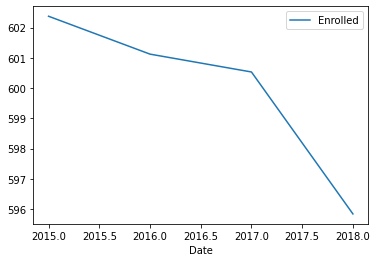

In [17]:
print("Annual global data")
df[["Enrolled"]].groupby(df.index.year).mean().plot.line()

Monthly global data


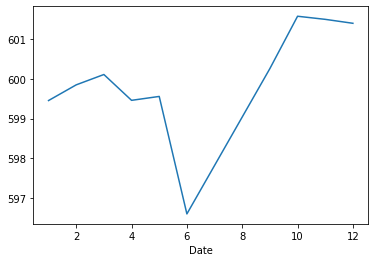

In [16]:
print("Monthly global data")
df['Enrolled'].groupby(df.index.month).mean().plot.line()

Annual global data. Present vs Ausent

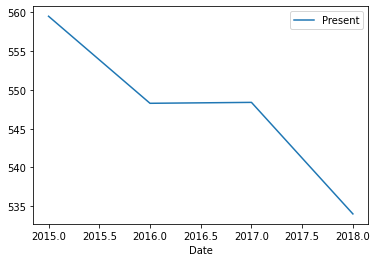

In [31]:
df[['Present']].groupby(df.index.year).mean().plot()

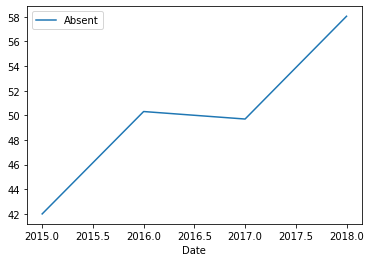

In [32]:
df[['Absent']].groupby(df.index.year).mean().plot()

<a id="4"><h3>
- Visualiza las parejas de variables. Usa scatter para ver relaciones. hex plots?
</h3></a>

In [35]:
df_corr = df.corr()
df_corr

,SchoolYear,Enrolled,Present,Absent,Released,Percentage
SchoolYear,1.000000,-0.003342,-0.005629,0.016644,-0.001931,-0.022039
Enrolled,-0.003342,1.000000,0.991840,0.540501,0.008282,0.189396
Present,-0.005629,0.991840,1.000000,0.443876,-0.054243,0.278203
Absent,0.016644,0.540501,0.443876,1.000000,-0.015763,-0.379628
Released,-0.001931,0.008282,-0.054243,-0.015763,1.000000,-0.407773
Percentage,-0.022039,0.189396,0.278203,-0.379628,-0.407773,1.000000


In [45]:
df_corr.style.background_gradient(cmap='coolwarm')

,SchoolYear,Enrolled,Present,Absent,Released,Percentage
SchoolYear,1.000000,-0.003342,-0.005629,0.016644,-0.001931,-0.022039
Enrolled,-0.003342,1.000000,0.991840,0.540501,0.008282,0.189396
Present,-0.005629,0.991840,1.000000,0.443876,-0.054243,0.278203
Absent,0.016644,0.540501,0.443876,1.000000,-0.015763,-0.379628
Released,-0.001931,0.008282,-0.054243,-0.015763,1.000000,-0.407773
Percentage,-0.022039,0.189396,0.278203,-0.379628,-0.407773,1.000000
